In [1]:
import sys
import seaborn as sns
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr, spearmanr
import scipy.stats as stats
from scipy.stats import gaussian_kde
import pandas as pd

In [47]:
#method = "eclip"
method = "clearclip"

RBP_name =  sys.argv[1]
k =  7 #k-mer length
Lgths = [10, 20, 50, 100, 200]  #peak length
#RBP_list = [ "HNRNPC", "HNRNPK", "HNRNPL", "TARDBP", "PCBP1","FXR1","PABPC4","U2AF2"]
#RBP_list = [ "HNRNPC", "HNRNPK", "HNRNPL", "TARDBP", "PCBP1", "FXR1"]
RBP_list = ["RBM4", "RBM41", "RBM5", "RBM6", "SFPQ"]
#conc = 1300
RBP_row_P = {}
RBP_row_S = {}

In [48]:
for RBP_name in RBP_list:
    print (RBP_name)
    P_corr_vals= []
    S_corr_vals = []
    
    #Extract BindnSeq enrichment scores 
    bind_enrich = {}
    kmer_list = []
    bind_file = open (f"data/RNA_Compete/{RBP_name}.txt","r")
    header = next (bind_file)
    for line in bind_file:
        bind_clms = line.split()
        kmer = bind_clms[0]
        kmer_list.append (kmer)
        enrich_score = bind_clms[1]
        #enrich_score = bind_clms[conc]#concentration 1 = 5, 2 = 20, 3= 80,4 = 320, 5 = 3200
        bind_enrich[kmer] = float(enrich_score)
        
    #Extract clearCLIP/eCLIP enrichment score
    method_enrichment_score = {} #with respect to flanking background
    #L = 50
    for L in Lgths:
        method_enrichment_file = open(f"data/{RBP_name}/{method}_{L}_peak_{k}-mer_enrichment.csv", "r")
        header = next(method_enrichment_file)
        for enric_line in method_enrichment_file:
            enric_clmns = enric_line.split()
            kmer = enric_clmns[0]
            enrich_score_back = enric_clmns[1]
            method_enrichment_score[kmer] = float(enrich_score_back)
        
        #Calculate correlation values
        Meth_List =[]
        BIND_list=[]
        for kmer in kmer_list:
            try:
                Meth_List.append(method_enrichment_score[kmer])
                BIND_list.append(bind_enrich[kmer])
            except:
                continue
        X = Meth_List
        Y = BIND_list
        p_corr = stats.pearsonr(X, Y)[0]
        S_corr = stats.spearmanr(X, Y)[0]
        P_corr_vals.append(p_corr)
        S_corr_vals.append(S_corr)
    RBP_row_P [RBP_name]= P_corr_vals
    RBP_row_S [RBP_name]= S_corr_vals

RBM4
RBM41
RBM5
RBM6
SFPQ


In [49]:
#Define dataframe
p_df =pd.DataFrame (columns = ["10","20","50","100","200"])
p_df


,10,20,50,100,200


In [50]:
for RBP_name in RBP_list:
    p_df.loc[RBP_name]= RBP_row_P[RBP_name]
p_df

,10,20,50,100,200
RBM4,0.261561,0.240809,0.268727,0.226116,0.184434
RBM41,-0.008113,-0.043598,-0.074954,0.006843,-0.089859
RBM5,-0.266023,-0.155810,0.031718,-0.043327,-0.019856
RBM6,0.177334,0.078127,0.019367,0.077003,0.061319
SFPQ,0.085466,-0.029988,0.196318,0.153482,0.143339


In [51]:
s_df =pd.DataFrame (columns = ["10","20","50","100","200"])
for RBP_name in RBP_list:
    s_df.loc[RBP_name]= RBP_row_S[RBP_name]
s_df

,10,20,50,100,200
RBM4,0.251012,0.284665,0.252109,0.242147,0.139085
RBM41,-0.020256,-0.043392,-0.101016,-0.016842,-0.111944
RBM5,-0.301456,-0.205185,0.003072,-0.079709,-0.071188
RBM6,0.160673,0.077274,0.021978,0.076152,0.070960
SFPQ,0.113154,0.007660,0.238707,0.163723,0.171710


In [52]:
def getCustomSymbol1(path_index=1):
  if path_index==1:  #upper triangle
      verts = [
      (0.0,0.0),
      (1.0,0.0),
      (1.0,1.0),
      (0.0,0.0),]
  else:              #lower triangle
      verts = [
      (0.0,0.0),
      (0.0,1.0),
      (1.0,1.0),
      (0.0,0.0),]
  codes = [matplotlib.path.Path.MOVETO,
           matplotlib.path.Path.LINETO,
           matplotlib.path.Path.LINETO,
           matplotlib.path.Path.CLOSEPOLY,
           ] 
  pathCS1 = matplotlib.path.Path(verts, codes)
  return pathCS1, verts

def plot_mat1(matrix=np.random.rand(40,40), path_index=1, alpha=1, vmin=0., vmax=1.):
    nx,ny = matrix.shape
    X,Y,values = zip(*[ (i,j,matrix[i,j]) for i in range(nx) for j in range(ny) ] )
    marker,verts = getCustomSymbol1(path_index=path_index)
    ax.scatter(X,Y,s=4000, 
               marker=marker, 
               c=values, 
               #cmap='plasma', 
               alpha=alpha, 
               vmin=vmin, vmax=vmax )
    return
def plot_mat(matrix=np.random.rand(90,50), path_index=1, alpha=1, vmin=0., vmax=1.):
    nx,ny = matrix.shape
    X,Y,values = zip(*[ (i,j,matrix[i,j]) for i in range(nx) for j in range(ny) ] )
    marker,verts = getCustomSymbol1(path_index=path_index)
    #ax = plt.axes()
    #sns.heatmap(df1, annot=True, ax = ax)
    #ax.set_title(f'{method}')
    ax.xaxis.tick_top()
    #ax.set_xticklabels(Lgths)
    #ax.set_yticklabels (RBP_list)
    ax.scatter(X,Y,s=4000, 
               marker=marker, 
               c=values, 
               cmap='plasma', 
               alpha=alpha, 
               vmin=vmin, vmax=vmax)
    return

K 7


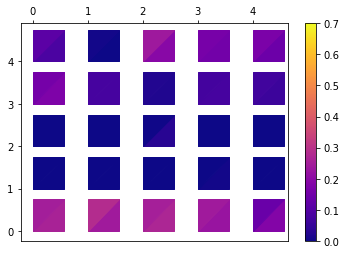

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)
A  = p_df.to_numpy()
B  = s_df.to_numpy()
vmin = 0
vmax = 0.7
print ("K",k)
plot_mat(path_index=1,vmin=vmin,vmax=vmax,matrix=A.transpose())
plot_mat(path_index=2,vmin=vmin,vmax=vmax,matrix=B.transpose())
#plt.xlim([0,6])
#plt.ylim([0,5])
# for the colorbar i did the trick to make first a fake mappable:
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=vmin, vmax=vmax ) )
sm._A=[]
#plt.xaxis.tick_top()
#plt.set_x
plt.colorbar(sm)
plt.show()
